# PROYECTO COIL: Análisis de datos del sistema AVISA Python

## Análisis de calidad del ruido


Durante los últimos tiempos, hemos notado cómo han incrementado los alarmantes niveles de contaminación sonora en Madrid. Este preocupante panorama ha sido el motor que ha impulsado a proponer cambios radicales en la planificación urbana de la ciudad.

En este marco, la información sobre la calidad del ruido ha sido puesta a disposición del público gracias al Sistema AVISA. Este sistema nos permite tener un panorama detallado del ruido en la ciudad, ya que recoge tanto los datos diarios como los históricos de los niveles registrados desde 2001 hasta 2018. Además, proporciona la lista de estaciones que se usan para analizar la contaminación.

Por lo tanto, vamos a explorar una selección de datos extraídos de este sistema, que nos revelarán cómo es la calidad del ruido en varias estaciones de Madrid, teniendo en cuenta diferentes variables.

In [1]:
# Importamos las librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Tenemos que modificar los parámetros de los gráficos en matplotlib:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6   # El primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos para el modelo

In [3]:
# Cargar el dataset desde el archivo csv de sis avisos recepcionados

df_avisa = pd.read_csv('FicheroRuido2023.csv.csv ', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'FicheroRuido2023.csv.csv '

In [ ]:
# Consultar los registros del DataFrame
df_avisa

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0.0,Aviso,2,Android,01/01/2023,12:05:04,8.0,Limpieza y pintadas,201,Pintadas y grafitis,...,NaN,13.0,Puente De Vallecas,6.0,Numancia,28038.0,444063.0,4472716.0,444068.0,4472720.0
1,0.0,Aviso,1,010,01/01/2023,12:17:18,0.0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,NaN,13.0,Puente De Vallecas,2.0,San Diego,28053.0,443124.0,4471768.0,443132.0,4471769.0
2,0.0,Aviso,2,Android,01/01/2023,12:21:54,18.0,Retirada de elementos,21,Animales muertos,...,NaN,20.0,San Blas-Canillejas,4.0,Arcos,28037.0,447000.0,4474799.0,447000.0,4474799.0
3,0.0,Aviso,1,010,01/01/2023,12:40:58,18.0,Retirada de elementos,21,Animales muertos,...,NaN,13.0,Puente De Vallecas,3.0,Palomeras Bajas,28018.0,444035.0,4469950.0,444043.0,4469951.0
4,0.0,Aviso,1,010,01/01/2023,12:56:38,18.0,Retirada de elementos,21,Animales muertos,...,NaN,10.0,Latina,7.0,Las Aguilas,28044.0,434749.0,4471245.0,434757.0,4471246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133169,0.0,Aviso,1.0,010,31/03/2023,10:50:24,25.0,Arboles y parques,30,Incidencias de riego,...,NaN,19.0,Vicalvaro,3.0,Valderrivas,28032.0,448459.0,4472149.0,448459.0,4472149.0
133170,0.0,Aviso,8.0,iOS,31/03/2023,10:53:15,48.0,Alumbrado p�blico,50,Farola apagada,...,NaN,15.0,Ciudad Lineal,1.0,Ventas,28017.0,444751.0,4475849.0,444757.0,4475845.0
133171,0.0,Aviso,1.0,010,31/03/2023,10:54:08,0.0,Cubos y contenedores,1,Nuevo cubo o contenedor,...,A,3.0,Retiro,1.0,Pacifico,28007.0,442076.0,4472750.0,442076.0,4472750.0
133172,0.0,Aviso,2.0,Android,31/03/2023,11:11:52,0.0,Cubos y contenedores,7,Horquillas delimitadoras,...,NaN,11.0,Carabanchel,7.0,Abrantes,28025.0,438168.0,4470226.0,438155.0,4470227.0


In [ ]:
# Conteo de valores perdidos/faltantes  
df_avisa.isna().sum()

TIPO_INCIDENCIA_ID           1
TIPO_INCIDENCIA              0
CANAL_DE_ENTRADA_ID        203
CANAL_DE_ENTRADA             0
FECHA_DE_RECEPCION           0
HORA_DE_RECEPCION            0
CATEGORIA_NIVEL1_ID          1
CATEGORIA_NIVEL1             0
CATEGORIA_NIVEL2_ID          1
CATEGORIA_NIVEL2             1
TIPO_VIAL                    1
NOMBRE_DE_VIAL               1
NUMERO                       1
CALIFICADOR             124677
DISTRITO_ID                  1
DISTRITO                     1
BARRIO_ID                    2
BARRIO                       2
CODIGO_POSTAL                2
COORDENADA_OFICIAL_X         2
COORDENADA_OFICIAL_Y         2
COORDENADA_REAL_X            2
COORDENADA_REAL_Y            2
dtype: int64

In [ ]:
# La información útil sobre los datos guardados en formato DataFrame
df_avisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133174 entries, 0 to 133173
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TIPO_INCIDENCIA_ID    133173 non-null  float64
 1   TIPO_INCIDENCIA       133174 non-null  object 
 2   CANAL_DE_ENTRADA_ID   132971 non-null  object 
 3   CANAL_DE_ENTRADA      133174 non-null  object 
 4   FECHA_DE_RECEPCION    133174 non-null  object 
 5   HORA_DE_RECEPCION     133174 non-null  object 
 6   CATEGORIA_NIVEL1_ID   133173 non-null  float64
 7   CATEGORIA_NIVEL1      133174 non-null  object 
 8   CATEGORIA_NIVEL2_ID   133173 non-null  object 
 9   CATEGORIA_NIVEL2      133173 non-null  object 
 10  TIPO_VIAL             133173 non-null  object 
 11  NOMBRE_DE_VIAL        133173 non-null  object 
 12  NUMERO                133173 non-null  float64
 13  CALIFICADOR           8497 non-null    object 
 14  DISTRITO_ID           133173 non-null  float64
 15  

In [ ]:
# Consultar los valores nulos
df_avisa['CALIFICADOR'].isna()

0          True
1          True
2          True
3          True
4          True
          ...  
133169     True
133170     True
133171    False
133172     True
133173     True
Name: CALIFICADOR, Length: 133174, dtype: bool

In [ ]:
# Contar los valores nulos para este campo
df_avisa['CALIFICADOR'].isna().sum()

124677

In [ ]:
# Mostrar los valores nulos para este campo
df_avisa['CALIFICADOR'][df_avisa['CALIFICADOR'].isna()]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
133168    NaN
133169    NaN
133170    NaN
133172    NaN
133173    NaN
Name: CALIFICADOR, Length: 124677, dtype: object

In [ ]:
# Sacar los registros que contienen valores nulos para este campo
df_avisa[133168:133175][['CALIFICADOR', 'TIPO_INCIDENCIA_ID', 'TIPO_INCIDENCIA', 'NUMERO','NOMBRE_DE_VIAL']]

,CALIFICADOR,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,NUMERO,NOMBRE_DE_VIAL
133168,NaN,0.0,Aviso,1.0,Antonio Vico
133169,NaN,0.0,Aviso,1.0,Campo De La Torre
133170,NaN,0.0,Aviso,14.0,Santa Elena
133171,A,0.0,Aviso,12.0,Tellez
133172,NaN,0.0,Aviso,87.0,Abrantes
133173,NaN,0.0,Aviso,89.0,Abrantes


In [ ]:
# Consultamos los registros que tienen algún valor nulo
df_avisa.drop(df_avisa.dropna().index)

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0.0,Aviso,2,Android,01/01/2023,12:05:04,8.0,Limpieza y pintadas,201,Pintadas y grafitis,...,NaN,13.0,Puente De Vallecas,6.0,Numancia,28038.0,444063.0,4472716.0,444068.0,4472720.0
1,0.0,Aviso,1,010,01/01/2023,12:17:18,0.0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,NaN,13.0,Puente De Vallecas,2.0,San Diego,28053.0,443124.0,4471768.0,443132.0,4471769.0
2,0.0,Aviso,2,Android,01/01/2023,12:21:54,18.0,Retirada de elementos,21,Animales muertos,...,NaN,20.0,San Blas-Canillejas,4.0,Arcos,28037.0,447000.0,4474799.0,447000.0,4474799.0
3,0.0,Aviso,1,010,01/01/2023,12:40:58,18.0,Retirada de elementos,21,Animales muertos,...,NaN,13.0,Puente De Vallecas,3.0,Palomeras Bajas,28018.0,444035.0,4469950.0,444043.0,4469951.0
4,0.0,Aviso,1,010,01/01/2023,12:56:38,18.0,Retirada de elementos,21,Animales muertos,...,NaN,10.0,Latina,7.0,Las Aguilas,28044.0,434749.0,4471245.0,434757.0,4471246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133168,0.0,Aviso,2.0,Android,31/03/2023,10:38:29,18.0,Retirada de elementos,24,Recogida de saco o contenedor de escombros,...,NaN,11.0,Carabanchel,3.0,San Isidro,28019.0,438925.0,4472100.0,438935.0,4472123.0
133169,0.0,Aviso,1.0,010,31/03/2023,10:50:24,25.0,Arboles y parques,30,Incidencias de riego,...,NaN,19.0,Vicalvaro,3.0,Valderrivas,28032.0,448459.0,4472149.0,448459.0,4472149.0
133170,0.0,Aviso,8.0,iOS,31/03/2023,10:53:15,48.0,Alumbrado p�blico,50,Farola apagada,...,NaN,15.0,Ciudad Lineal,1.0,Ventas,28017.0,444751.0,4475849.0,444757.0,4475845.0
133172,0.0,Aviso,2.0,Android,31/03/2023,11:11:52,0.0,Cubos y contenedores,7,Horquillas delimitadoras,...,NaN,11.0,Carabanchel,7.0,Abrantes,28025.0,438168.0,4470226.0,438155.0,4470227.0


In [ ]:
# El tamaño esperado para el dataset limpio
df_avisa.shape[0] - 124678

8496

Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [ ]:
df_avisa_filt = df_avisa.dropna().reset_index(drop=True)
df_avisa_filt

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0.0,Aviso,8,iOS,01/01/2023,01:58:42,48.0,Alumbrado p�blico,51,Calle apagada,...,B,20.0,San Blas-Canillejas,5.0,Rosas,28022.0,448669.0,4474976.0,448685.0,4475039.0
1,0.0,Aviso,1,010,01/01/2023,06:34:18,8.0,Limpieza y pintadas,9,Limpieza en v�as p�blicas,...,A,15.0,Ciudad Lineal,2.0,Pueblo Nuevo,28017.0,446447.0,4475009.0,446454.0,4475010.0
2,0.0,Aviso,8,iOS,01/01/2023,09:03:50,55.0,Mobiliario urbano,60,Vallas,...,C,18.0,Villa De Vallecas,3.0,Ensanche De Vallecas,28051.0,449726.0,4467995.0,449694.0,4467999.0
3,0.0,Aviso,2,Android,01/01/2023,09:14:49,18.0,Retirada de elementos,24,Recogida de saco o contenedor de escombros,...,B,16.0,Hortaleza,6.0,Valdefuentes,28050.0,444649.0,4481699.0,444652.0,4481703.0
4,0.0,Aviso,2,Android,01/01/2023,09:23:30,25.0,Arboles y parques,27,Arbol en mal estado,...,A,18.0,Villa De Vallecas,3.0,Ensanche De Vallecas,28051.0,447512.0,4468660.0,447501.0,4468677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491,1.0,Petici�n,2.0,Android,31/03/2023,08:06:24,70.0,Se�ales y sem�foros,72,Nueva se�al,...,A,13.0,Puente De Vallecas,6.0,Numancia,28038.0,443623.0,4472346.0,443624.0,4472342.0
8492,1.0,Petici�n,2.0,Android,31/03/2023,08:59:53,49.0,Alumbrado p�blico,52,Peticiones alumbrado,...,D,17.0,Villaverde,4.0,Los Rosales,28021.0,441366.0,4466613.0,441358.0,4466612.0
8493,0.0,Aviso,2.0,Android,31/03/2023,08:53:09,0.0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,G,19.0,Vicalvaro,4.0,El Ca�averal,28052.0,453592.0,4472169.0,453595.0,4472175.0
8494,0.0,Aviso,3.0,Canal web,31/03/2023,09:59:25,39.0,Calzadas y aceras,43,Desperfecto en acera,...,C,17.0,Villaverde,1.0,Villaverde Alto C.h.,28021.0,440033.0,4464854.0,440039.0,4464848.0


### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [ ]:
# Echamos un vistazo a las características de cada columna
df_avisa_filt.describe()

,TIPO_INCIDENCIA_ID,CATEGORIA_NIVEL1_ID,NUMERO,DISTRITO_ID,BARRIO_ID,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
count,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8.496000e+03,8496.000000,8.496000e+03
mean,0.033427,23.965866,64.787194,11.492938,3.812735,28030.780956,442603.077801,4.474893e+06,442603.818856,4.474893e+06
std,0.179761,24.876746,275.959281,5.775530,2.048185,14.397712,4266.785384,4.805942e+03,4267.210361,4.805704e+03
min,0.000000,0.000000,0.000000,1.000000,1.000000,28001.000000,429069.000000,4.463783e+06,429076.000000,4.463783e+06
25%,0.000000,8.000000,5.000000,8.000000,2.000000,28021.000000,439785.750000,4.471106e+06,439786.250000,4.471097e+06
50%,0.000000,18.000000,16.000000,11.000000,4.000000,28031.000000,442471.000000,4.474350e+06,442472.000000,4.474350e+06
75%,0.000000,39.000000,45.000000,17.000000,6.000000,28043.000000,445899.000000,4.478747e+06,445906.000000,4.478752e+06
max,1.000000,185.000000,6000.000000,21.000000,9.000000,28055.000000,453750.000000,4.489310e+06,453757.000000,4.489310e+06


In [ ]:
# Consultamos el tipo de datos
df_avisa_filt.dtypes

TIPO_INCIDENCIA_ID      float64
TIPO_INCIDENCIA          object
CANAL_DE_ENTRADA_ID      object
CANAL_DE_ENTRADA         object
FECHA_DE_RECEPCION       object
HORA_DE_RECEPCION        object
CATEGORIA_NIVEL1_ID     float64
CATEGORIA_NIVEL1         object
CATEGORIA_NIVEL2_ID      object
CATEGORIA_NIVEL2         object
TIPO_VIAL                object
NOMBRE_DE_VIAL           object
NUMERO                  float64
CALIFICADOR              object
DISTRITO_ID             float64
DISTRITO                 object
BARRIO_ID               float64
BARRIO                   object
CODIGO_POSTAL           float64
COORDENADA_OFICIAL_X    float64
COORDENADA_OFICIAL_Y    float64
COORDENADA_REAL_X       float64
COORDENADA_REAL_Y       float64
dtype: object

Los algoritmos **entienden de números y no otra cosa!**, con lo cual para que el algoritmo pueda trabajar con toda la información del dataset, los datos se tienen que **transformar en valores numéricos**.

In [ ]:
# Consultar las variables que son del tipo "string"
df_avisa_filt.dtypes[df_avisa_filt.dtypes=='object']

TIPO_INCIDENCIA        object
CANAL_DE_ENTRADA_ID    object
CANAL_DE_ENTRADA       object
FECHA_DE_RECEPCION     object
HORA_DE_RECEPCION      object
CATEGORIA_NIVEL1       object
CATEGORIA_NIVEL2_ID    object
CATEGORIA_NIVEL2       object
TIPO_VIAL              object
NOMBRE_DE_VIAL         object
CALIFICADOR            object
DISTRITO               object
BARRIO                 object
dtype: object

Salvo `CANAL_DE_ENTRADA`, que indica de que tipo de medio se usa el aviso o la peticion El resto se puede quitar por no ser tan relevantes

In [ ]:
# Analizar
df_avisa_filt['CANAL_DE_ENTRADA'].value_counts()

010                                  4261
Android                              2426
Canal web                             799
iOS                                   700
Twitter                               296
SYR (Sugerencias y reclamaciones)       7
OAC                                     7
Name: CANAL_DE_ENTRADA, dtype: int64

Se observa que en el conjunto de datos existen datos **no tan descriptivos** como el **TIPO DE VIAL** y alguna información asociada a esto como puede ser el **HORA DE RECEPCION** o el **BARRIO**. 

In [ ]:
# Datos informativos
df_avisa_filt['TIPO_INCIDENCIA_ID'].value_counts()

0.0    8212
1.0     284
Name: TIPO_INCIDENCIA_ID, dtype: int64

In [ ]:
# Datos informativos
df_avisa_filt['CATEGORIA_NIVEL1_ID'].value_counts()

18.0     2183
0.0      1870
8.0      1252
39.0      924
25.0      650
48.0      341
83.0      270
55.0      196
105.0     138
62.0      116
56.0      104
68.0       89
34.0       81
13.0       70
70.0       59
49.0       44
40.0       41
63.0       29
180.0      26
35.0        7
75.0        5
185.0       1
Name: CATEGORIA_NIVEL1_ID, dtype: int64

En la lista ``columnas_drop`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [ ]:
columnas_drop= ['TIPO_INCIDENCIA','FECHA_DE_RECEPCION','HORA_DE_RECEPCION','CATEGORIA_NIVEL1','CATEGORIA_NIVEL2','TIPO_VIAL','NOMBRE_DE_VIAL', 'CALIFICADOR','DISTRITO','BARRIO']

Creamos un nuevo dataset que sea como el tablón anterior, eliminando las columnas de la lista indicada. Utilizamos el método `drop` para _DataFrames_ de _pandas_.

In [ ]:
df_avisa_filt2 = df_avisa_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_avisa_filt.shape)
print("Tamaño del tablón nuevo: ", df_avisa_filt2.shape)

Tamaño del tablón filtrado:  (8496, 23)
Tamaño del tablón nuevo:  (8496, 13)


In [ ]:
# Tipología de las variables exsitentes en el nuevo dataset
df_avisa_filt2.dtypes.value_counts()

float64    10
object      3
dtype: int64

Sklearn ofrece métodos directos para cambiar variables en formatos numéricos. Entre estos encontramos:

1. `sklearn.preprocessing.LabelEncoder`: Este método toma una matriz de strings o enteros y nos devuelve otra de enteros, con valores que van desde 0 hasta n-1, siendo n el número total de categorías en la variable.

Sin embargo, hay que tener en cuenta que LabelEncoder puede presentar problemas cuando hay más de dos clases. Esto se debe a que el algoritmo podría interpretar que existe una relación de orden entre los datos, cuando no es así. Un ejemplo sería una variable categórica que recoge los puntos cardinales (N,S,E,O). Cada punto cardinal tiene un valor único, pero ninguno es más importante que otro. Al usar LabelEncoder, se nos devuelve una matriz con valores entre (0,1,2,3), lo que podría llevar a algunos algoritmos a concluir erróneamente que estos datos tienen una relación de orden.

2. `sklearn.preprocessing.OneHotEncoder`: Para solucionar el problema anterior, se puede utilizar este método. OneHotEncoder crea n-1 variables "dummies" o binarias, es decir, variables que solo toman los valores (0,1). Este enfoque evita cualquier inferencia de un orden en las categorías, ya que cada variable solo indica 1 si "es norte" y 0 si "no es norte", por ejemplo.

Sin embargo, este método también tiene un inconveniente. Si tenemos un gran número de variables categóricas con muchos tipos y clases diferentes, convertirlas en variables binarias aumentará significativamente el tamaño de nuestro conjunto de datos. Ahora analizaremos el caso de la única variable que aún no es numérica (`CANAL_DE_ENTRADA`), que requiere un tratamiento específico.


En nuestro csv hemos visto que hay una variable que se llama **"CANAL_DE_ENTRADA"** que indica por que medio ha entrado el aviso. Esta variable tiene 7 categorías:  
- '010'
- 'Android'
- 'Canal Web'
- 'iOS'
- 'Twitter'
- 'SYR (Sugerencias y reclamaciones)'
- 'OAC'

Primero vamos a **agruparlas en dos grupos de (ELECTRONICO, OTROS)** y después convertirlas en valores numéricos.

In [ ]:
# La variable de CANAL DE ENTRADA, se requiere agrupar y posteriormente convertirse en números
df_avisa_filt2['CANAL_DE_ENTRADA'].value_counts()

010                                  4261
Android                              2426
Canal web                             799
iOS                                   700
Twitter                               296
SYR (Sugerencias y reclamaciones)       7
OAC                                     7
Name: CANAL_DE_ENTRADA, dtype: int64

In [ ]:
# Utilizamos estas listas como categorías para poder agruparlos posteriormente
electronico =['Android','Canal web','iOS', 'Twitter']
otros = ['010','SYR (Sugerencias y reclamaciones)','OAC']

In [ ]:
# Creamos una nueva columna en una nueva DataFrame con los datos agrupados
df_avisa_filt3 = df_avisa_filt2.copy()
df_avisa_filt3['CANAL_DE_ENTRADA'] = df_avisa_filt3['CANAL_DE_ENTRADA'].apply(lambda x: "E" if x in electronico else
                                                                    "O")

In [ ]:
# Consultamos los nuevos valores de la nueva columna
df_avisa_filt3['CANAL_DE_ENTRADA'].value_counts()

O    4275
E    4221
Name: CANAL_DE_ENTRADA, dtype: int64

In [ ]:
# Comprobamos que están todas las celdas bien agrupadas
df_avisa_filt3.groupby('CANAL_DE_ENTRADA').count()['TIPO_INCIDENCIA_ID']

CANAL_DE_ENTRADA
E    4221
O    4275
Name: TIPO_INCIDENCIA_ID, dtype: int64

Una vez que ya tenemos nuestra columna al día, vamos a emplear los encoders de sklearn para cambiar su formato. En lugar de agregar más columnas a nuestro conjunto de datos, vamos a usar el método LabelEncoder:

* La función 'sklearn.preprocessing.LabelEncoder' es bastante útil porque convierte las etiquetas de una variable de categoría en valores numéricos. ¿Y sabes qué? Estos números están entre 0 y el número total de categorías, menos uno.  

* Cuando creamos un encoder, tenemos que entrenarlo con el método 'fit'. Este paso establece la relación entre las etiquetas y los números basándose en las categorías existentes en la variable.   

* Después de eso, usamos el método 'transform' para asignar los números que corresponden a cada etiqueta. Este proceso se basa en la relación que acabamos de establecer.  

* Si queremos ser más eficientes, podemos usar el método 'fit_transform'. ¿Y sabes qué hace? Bueno, simplemente realiza las dos acciones que acabo de describir, pero al mismo tiempo. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_avisa_filt3['CANAL_DE_ENTRADA'])

LabelEncoder()

Esta función tiene una característica llamada "classes_". Lo que hace es guardar un arreglo que hace corresponder las etiquetas con números. Estos números se asignan de acuerdo a la posición de cada etiqueta dentro del arreglo.

In [ ]:
# Obtenemos las propiedades:
etiquetado.classes_

array(['E', 'O'], dtype=object)

In [ ]:
# Transformamos el dataset aplicando el mapeado:
etiquetado.transform(df_avisa_filt3['CANAL_DE_ENTRADA'])

array([0, 1, 0, ..., 0, 0, 1])

Claramente, cuando utilizamos el método _transform_, lo que obtenemos es un conjunto de números enteros en formato numpy. Pero, ¿qué si incorporamos estos valores numéricos en una columna completamente nueva que denominaremos **'canal_entrada_etiquetado'**? Sería interesante analizar si hay alguna correlación entre la columna existente `CANAL_DE_ENTRADA` y esta flamante columna `canal_entrada_etiquetado`. De confirmarse una relación, podríamos considerar prescindir de los datos que no son numéricos.


In [ ]:
# Asignar una nueva columna
df_avisa_filt3['canal_entrada_etiquetado'] = etiquetado.transform(df_avisa_filt3['CANAL_DE_ENTRADA'])

# mostrar la relación con el dato original
df_avisa_filt3.groupby(['CANAL_DE_ENTRADA','canal_entrada_etiquetado']).count()[['TIPO_INCIDENCIA_ID']]

,,TIPO_INCIDENCIA_ID
CANAL_DE_ENTRADA,canal_entrada_etiquetado,
E,0,4221
O,1,4275


In [ ]:
# Definimos un nuevo dataframe con solamente datos transformados a valores numéricos
df_avisa_filt4 = df_avisa_filt3.drop('CANAL_DE_ENTRADA', axis='columns')

# Consultar el tipo de las variables
df_avisa_filt4.dtypes.value_counts()

float64    10
object      2
int32       1
dtype: int64

In [ ]:
# La variable de CANAL DE ENTRADA ID que se requiere agrupar y posteriormente convertirse en números
df_avisa_filt2['CANAL_DE_ENTRADA_ID'].value_counts()

1.0    3165
2.0    1878
1      1096
3.0     573
2       548
8.0     519
3       226
7.0     194
8       181
7       102
5.0       6
9         4
9.0       3
5         1
Name: CANAL_DE_ENTRADA_ID, dtype: int64

In [ ]:
# Convierte todos los valores en la columna a enteros
df_avisa_filt4['CANAL_DE_ENTRADA_ID'] = df_avisa_filt2['CANAL_DE_ENTRADA_ID'].astype(int)

# Consultamos los nuevos valores de la nueva columna
df_avisa_filt4['CANAL_DE_ENTRADA_ID'].value_counts()

1    4261
2    2426
3     799
8     700
7     296
9       7
5       7
Name: CANAL_DE_ENTRADA_ID, dtype: int64

In [ ]:
# La variable de CANAL DE ENTRADA ID que se requiere agrupar y posteriormente convertirse en números
df_avisa_filt2['CATEGORIA_NIVEL2_ID'].value_counts()

19     1096
1       677
19      359
201     350
24      346
       ... 
81        1
23        1
85        1
79        1
193       1
Name: CATEGORIA_NIVEL2_ID, Length: 133, dtype: int64

In [ ]:
# Convierte todos los valores en la columna a enteros
df_avisa_filt4['CATEGORIA_NIVEL2_ID'] = df_avisa_filt2['CATEGORIA_NIVEL2_ID'].astype(int)

# Consultamos los nuevos valores de la nueva columna
df_avisa_filt4['CATEGORIA_NIVEL2_ID'].value_counts()

19     1455
1       946
43      455
9       452
201     452
       ... 
108       1
88        1
78        1
77        1
193       1
Name: CATEGORIA_NIVEL2_ID, Length: 72, dtype: int64

In [ ]:
# Tipología de las variables exsitentes en el nuevo dataset
df_avisa_filt4.dtypes.value_counts()

float64    10
int32       3
dtype: int64

### **Reducción de Variables (_Dimensionality Reduction_)**

Existen muchos métodos de reducción de variables existentes en _sklearn_:

Claro, puedo hacerlo sonar más conversacional y fácil de entender. Aquí está la nueva versión:

- **Filtrado por Varianza**:

Piensa en ello como en una fiesta en la que solo quieres invitar a los amigos más divertidos. Del mismo modo, este método establece una "diversión mínima" (varianza) utilizando `from sklearn.feature_selection import VarianceThreshold`, y aquellos que no la alcanzan (variables casi constantes) son excluidos de la fiesta (dataset). Los métodos `fit` y `transform` son nuestros porteros en esta fiesta de datos.

El único problema es que no es tan fácil identificar a quienes se ha dejado fuera. Debes comparar columna por columna en tu lista de invitados original (dataframe) y la lista final para ver quiénes faltan.

- **Filtros Univariantes Basados en Clasificación de p-values**:

Dependiendo de si estamos en una carrera de clasificación o regresión, se aplica un test de pista y campo (test estadístico como chi cuadrado o anova). Luego indicamos cuántos corredores (variables) queremos en nuestro equipo, se realiza una clasificación y elegimos a los 'k' corredores con los tiempos (p-valores) más rápidos y mayor independencia entre ellos.

- **Selección Basada en Árbol de Decisión (Importancia de Árboles de Decisión)**:

Esta táctica implica entrenar un árbol de decisión muy enfocado (sobreajustado) utilizando todo el dataset, y luego quedarnos con las variables que explican una cierta cantidad de información, como el 90% o el 95%.

Todos los modelos de sklearn son como atletas y cuentan con estos movimientos:  
  - `fit`, para entrenar con el conjunto de datos de entrenamiento y la variable objetivo.
  - `predict`, para prever el resultado basándose en un conjunto de variables independientes. Debe utilizar las mismas variables que utilizó para entrenar (fit).
  - `score`, para evaluar el rendimiento del modelo. En el caso de la regresión, muestra el coeficiente de determinación ($R^2$) y, en la clasificación, muestra la precisión, que es el porcentaje de aciertos.

- **Selección Basada en Métodos Recursivos**:

Este es similar a cómo funcionan las regresiones "hacia atrás". Empezamos con todas las variables en la mesa y comenzamos a eliminar una a una, como si estuviéramos depurando un programa complicado.



### Importancia de variables

Vamos a aclarar un poco las cosas. Tenemos un conjunto de variables de entrada, también conocidas como variables independientes, y una variable objetivo, que es `CATEGORIA_NIVEL2_ID`. Vamos a almacenar esta última en una variable que llamaremos `target`.

Para seguir, vamos a necesitar la ayuda de la biblioteca _sklearn_. De ella vamos a importar una clase que se especializa en árboles de regresión. Con esta herramienta en mano, podemos entrenar un árbol con todos los datos que tenemos en el dataset. Este proceso nos permitirá identificar cuáles son las variables más importantes en nuestros datos.

In [ ]:
# Generar la lista de features y la variable target
target = 'CATEGORIA_NIVEL2_ID'
features = [x for x in df_avisa_filt4.columns if x!=target]

print(target)
print(features)

CATEGORIA_NIVEL2_ID
['TIPO_INCIDENCIA_ID', 'CANAL_DE_ENTRADA_ID', 'CATEGORIA_NIVEL1_ID', 'NUMERO', 'DISTRITO_ID', 'BARRIO_ID', 'CODIGO_POSTAL', 'COORDENADA_OFICIAL_X', 'COORDENADA_OFICIAL_Y', 'COORDENADA_REAL_X', 'COORDENADA_REAL_Y', 'canal_entrada_etiquetado']


In [ ]:
# Consultar la variable de salida
df_avisa_filt4[target]

0       51
1        9
2       60
3       24
4       27
        ..
8491    72
8492    52
8493     3
8494    43
8495     1
Name: CATEGORIA_NIVEL2_ID, Length: 8496, dtype: int32

In [ ]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_avisa_filt4[features], y=df_avisa_filt4[target])

DecisionTreeRegressor(max_depth=22, random_state=100)

In [ ]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_avisa_filt4[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_avisa_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_avisa_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_avisa_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_avisa_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_avisa_filt4[target], y_pred_arbol))

Mean Absolute Error: 0.4734537101963009
Mean Absolute Percentage Error: 4.3000437051609035
Mean Squared Error: 28.6315910516331
Root Mean Squared Error: 5.350849563539709
R^2 coefficient of determination: 0.9872645527921425


¡El modelo tiene un rendimiento excelente! Ahora es el momento de identificar las variables que el modelo ha señalado como más cruciales. El árbol nos ofrece un panorama claro de la relevancia de cada variable, siguiendo el orden en que aparecen en nuestro conjunto de datos.

In [ ]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([3.70605971e-04, 4.42651043e-02, 4.28122486e-01, 8.13513208e-02,
       6.58282176e-03, 2.04908162e-02, 5.51076389e-02, 1.37232637e-01,
       6.10331865e-02, 7.59645153e-02, 7.94020061e-02, 1.00768606e-02])

Parece que el método `feature_importances_` nos proporciona un array que contiene la importancia de las características expresada en porcentajes. Para vincular estos valores con sus correspondientes variables, podríamos crear una serie. Esta serie tendría como índices a las variables y al lado mostraría su respectiva importancia.

In [ ]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
CATEGORIA_NIVEL1_ID,0.428122
COORDENADA_OFICIAL_X,0.137233
NUMERO,0.081351
COORDENADA_REAL_Y,0.079402
COORDENADA_REAL_X,0.075965
COORDENADA_OFICIAL_Y,0.061033
CODIGO_POSTAL,0.055108
CANAL_DE_ENTRADA_ID,0.044265
BARRIO_ID,0.020491
canal_entrada_etiquetado,0.010077


Claro, podemos reescribirlo de una manera más humana y relajada:

Imagina que estás armando una lista que contiene las variables que albergan el 95% de la información que necesitamos. Ahora, en el DataFrame "importancia" que ya habíamos creado antes, vamos a introducir una nueva columna que hemos llamado 'imp_acum'. ¿Y qué hace esta columna? Bueno, simplemente suma y acumula los datos para nosotros.

In [ ]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
CATEGORIA_NIVEL1_ID,0.428122,0.428122
COORDENADA_OFICIAL_X,0.137233,0.565355
NUMERO,0.081351,0.646706
COORDENADA_REAL_Y,0.079402,0.726108
COORDENADA_REAL_X,0.075965,0.802073
COORDENADA_OFICIAL_Y,0.061033,0.863106
CODIGO_POSTAL,0.055108,0.918214
CANAL_DE_ENTRADA_ID,0.044265,0.962479
BARRIO_ID,0.020491,0.982970
canal_entrada_etiquetado,0.010077,0.993047


In [ ]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
CATEGORIA_NIVEL1_ID,0.428122,0.428122
COORDENADA_OFICIAL_X,0.137233,0.565355
NUMERO,0.081351,0.646706
COORDENADA_REAL_Y,0.079402,0.726108
COORDENADA_REAL_X,0.075965,0.802073
COORDENADA_OFICIAL_Y,0.061033,0.863106
CODIGO_POSTAL,0.055108,0.918214


In [ ]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
print(variables)

['CANAL_DE_ENTRADA_ID', 'BARRIO_ID', 'canal_entrada_etiquetado', 'DISTRITO_ID', 'TIPO_INCIDENCIA_ID']


In [ ]:
print(len(variables))

5


In [ ]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  12
Variables no importantes (a eliminar):  5


Ahora podemos filtrar el tablón para quedarnos solamente con las variables importantes.

In [ ]:
df_avisa_filt5 = df_avisa_filt4.drop(labels=variables, axis='columns')
df_avisa_filt5

,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL2_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,48.0,51,12.0,28022.0,448669.0,4474976.0,448685.0,4475039.0
1,8.0,9,152.0,28017.0,446447.0,4475009.0,446454.0,4475010.0
2,55.0,60,36.0,28051.0,449726.0,4467995.0,449694.0,4467999.0
3,18.0,24,11.0,28050.0,444649.0,4481699.0,444652.0,4481703.0
4,25.0,27,16.0,28051.0,447512.0,4468660.0,447501.0,4468677.0
...,...,...,...,...,...,...,...,...
8491,70.0,72,33.0,28038.0,443623.0,4472346.0,443624.0,4472342.0
8492,49.0,52,11.0,28021.0,441366.0,4466613.0,441358.0,4466612.0
8493,0.0,3,201.0,28052.0,453592.0,4472169.0,453595.0,4472175.0
8494,39.0,43,16.0,28021.0,440033.0,4464854.0,440039.0,4464848.0


### **Planteamiento del ejercicio de clasificación**
Claro, aquí tienes tu texto reescrito de una manera un poco más humana y amigable.

Estamos planeando definir una nueva variable a la que llamaremos 'Escenario'. Esta tendrá dos posibles valores o 'clases', que son 0 y 1. ¿Cómo determinaremos cuáles entran en cada clase? Bueno, basaremos esto en la variable existente 'CATEGORIA_NIVEL2_ID'.

Si el valor de esta variable cae por debajo del percentil 33, asignaremos a esa entrada la clase 0 en nuestro nuevo 'Escenario'. Si, por el contrario, el valor está por encima del percentil 33, se le asignará la clase 1.

Una vez hecho esto, ya no necesitaremos la columna 'CATEGORIA_NIVEL2_ID' en nuestro conjunto de datos, así que la quitaremos. Después, partiremos el conjunto de datos en dos: uno para entrenamiento y otro para pruebas. Normalmente, esta división suele ser en una proporción de 80% para entrenamiento y 20% para pruebas.

Entonces, ¿qué es lo que intentaremos lograr con todo esto? Queremos prever si la calidad del aire en diferentes áreas caerá en la clase 0 o 1 de nuestro 'Escenario'. Es decir, queremos anticipar si la calidad del ruido será superior o inferior al valor representado por el percentil 33 en la categoría 'CATEGORIA_NIVEL2_ID'.


In [ ]:
# Hacemos una copia del tablón filtrado para no trabajar sobre original
df_avisa_calidad = df_avisa_filt5.copy()

In [ ]:
# Crear la columna nueva "Escenario" y borrar la columna target antigua 'Calidad_NO2'
df_avisa_calidad["Escenario"] = np.where(df_avisa_calidad['CATEGORIA_NIVEL2_ID']<df_avisa_calidad['CATEGORIA_NIVEL2_ID'].quantile(0.33),0,1)

df_avisa_calidad.drop(['CATEGORIA_NIVEL2_ID'], axis='columns', inplace=True)
df_avisa_calidad

,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y,Escenario
0,48.0,12.0,28022.0,448669.0,4474976.0,448685.0,4475039.0,1
1,8.0,152.0,28017.0,446447.0,4475009.0,446454.0,4475010.0,0
2,55.0,36.0,28051.0,449726.0,4467995.0,449694.0,4467999.0,1
3,18.0,11.0,28050.0,444649.0,4481699.0,444652.0,4481703.0,1
4,25.0,16.0,28051.0,447512.0,4468660.0,447501.0,4468677.0,1
...,...,...,...,...,...,...,...,...
8491,70.0,33.0,28038.0,443623.0,4472346.0,443624.0,4472342.0,1
8492,49.0,11.0,28021.0,441366.0,4466613.0,441358.0,4466612.0,1
8493,0.0,201.0,28052.0,453592.0,4472169.0,453595.0,4472175.0,0
8494,39.0,16.0,28021.0,440033.0,4464854.0,440039.0,4464848.0,1


In [ ]:
df_avisa_calidad.describe()

,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y,Escenario
count,8496.000000,8496.000000,8496.000000,8496.000000,8.496000e+03,8496.000000,8.496000e+03,8496.000000
mean,23.965866,64.787194,28030.780956,442603.077801,4.474893e+06,442603.818856,4.474893e+06,0.684204
std,24.876746,275.959281,14.397712,4266.785384,4.805942e+03,4267.210361,4.805704e+03,0.464859
min,0.000000,0.000000,28001.000000,429069.000000,4.463783e+06,429076.000000,4.463783e+06,0.000000
25%,8.000000,5.000000,28021.000000,439785.750000,4.471106e+06,439786.250000,4.471097e+06,0.000000
50%,18.000000,16.000000,28031.000000,442471.000000,4.474350e+06,442472.000000,4.474350e+06,1.000000
75%,39.000000,45.000000,28043.000000,445899.000000,4.478747e+06,445906.000000,4.478752e+06,1.000000
max,185.000000,6000.000000,28055.000000,453750.000000,4.489310e+06,453757.000000,4.489310e+06,1.000000


In [10]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_avisa_calidad, orient='v')
plt.show()

NameError: name 'df_avisa_calidad' is not defined

<Figure size 2000x600 with 0 Axes>

### **Paso 1.**  Obtención y preparación de datos

In [ ]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_avisa_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los tipos de incidente que se notifican
y = df_avisa_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [ ]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[ 0.96618536, -0.19129743, -0.60992141, ...,  0.01717128,
         1.42517911,  0.03032153],
       [-0.64183659,  0.31605365, -0.95721926, ...,  0.02403818,
         0.90232434,  0.02428668],
       [ 1.2475892 , -0.10432296,  1.40440613, ..., -1.43549095,
         1.66164727, -1.43469052],
       ...,
       [-0.96344097,  0.49362653,  1.4738657 , ..., -0.5669317 ,
         2.57588146, -0.56567201],
       [ 0.60438042, -0.17680168, -0.67938098, ..., -2.08909531,
        -0.6010882 , -2.09040827],
       [-0.96344097, -0.19129743, -1.65181497, ..., -0.44603258,
        -0.12369906, -0.44601548]])

In [ ]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0.966185,-0.191297,-0.609921,1.421745,0.017171,1.425179,0.030322
1,-0.641837,0.316054,-0.957219,0.900947,0.024038,0.902324,0.024287
2,1.247589,-0.104323,1.404406,1.669487,-1.435491,1.661647,-1.434691
3,-0.239831,-0.194921,1.334947,0.479528,1.416147,0.480010,1.417089
4,0.041573,-0.176802,1.404406,1.150564,-1.297112,1.147698,-1.293600
...,...,...,...,...,...,...,...
8491,1.850597,-0.115195,0.501432,0.239052,-0.530100,0.239089,-0.530920
8492,1.006386,-0.194921,-0.679381,-0.289949,-1.723069,-0.291969,-1.723323
8493,-0.963441,0.493627,1.473866,2.575609,-0.566932,2.575881,-0.565672
8494,0.604380,-0.176802,-0.679381,-0.602381,-2.089095,-0.601088,-2.090408


In [ ]:
X_normal.describe().round(4)

,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
count,8496.0000,8496.0000,8496.0000,8496.0000,8496.0000,8496.0000,8496.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-0.9634,-0.2348,-2.0686,-3.1721,-2.3120,-3.1704,-2.3120
25%,-0.6418,-0.2167,-0.6794,-0.6603,-0.7880,-0.6603,-0.7901
50%,-0.2398,-0.1768,0.0152,-0.0310,-0.1132,-0.0309,-0.1130
75%,0.6044,-0.0717,0.8487,0.7725,0.8019,0.7739,0.8031
max,6.4737,21.5088,1.6822,2.6126,2.9999,2.6138,3.0001


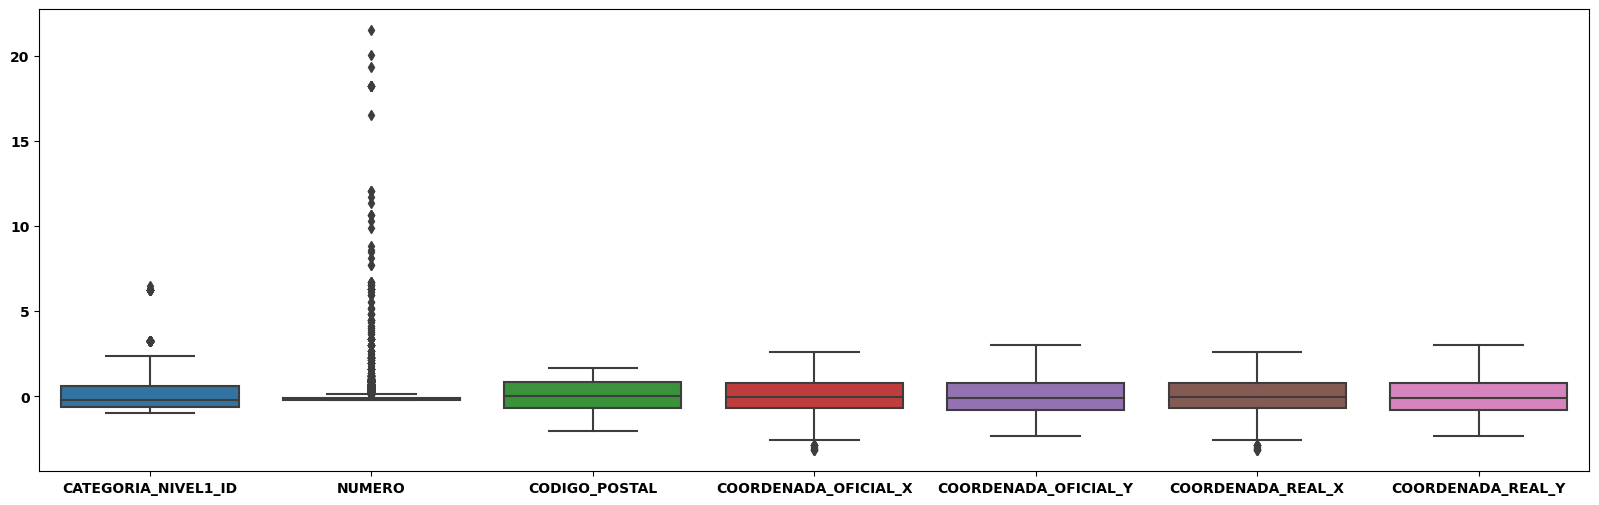

In [ ]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test

In [ ]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [ ]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

6796
1700


8496

### **Paso 3.** Cargar y elegir el modelo de regresión logística

In [ ]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

### **Paso 4.** Entrenar el modelo de regresión logística con los datos de entrenamiento

In [ ]:
# Entrenar el modelo
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

Una vez que hemos entrenado nuestro modelo, lo que haremos será extraer las predicciones y estudiar detenidamente los resultados. De igual forma, nos enfocaremos en obtener algunas métricas específicas basadas en el conjunto de datos de prueba. A través de estas métricas, seremos capaces de discernir si nuestro modelo ha logrado clasificar de manera acertada todos los niveles de calidad de la contaminación del ruido que habíamos definido previamente.

### **Paso 5.** Obtener las predicciones 

In [ ]:
# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)

In [ ]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[0 0 1 ... 1 0 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9382352941176471

Claro, aquí tienes una versión reescrita de tu texto con un estilo más personal y humano:

"Vamos a explorar algunas otras métricas que nos ayudan a evaluar nuestros modelos de clasificación. Verás, hay varios indicadores útiles y cada uno nos ofrece una perspectiva única. ¿Y la mejor parte? Muchas de estas medidas se agrupan y se presentan de forma concisa en un informe conocido como **classification_report**. Entonces, vamos a sumergirnos y descubrir más sobre ellos."

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       539
           1       0.96      0.95      0.95      1161

    accuracy                           0.94      1700
   macro avg       0.93      0.93      0.93      1700
weighted avg       0.94      0.94      0.94      1700



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9339071780932245

In [8]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

NameError: name 'y_test' is not defined

---

### **`PLANTEAMIENTO 2`**

Vamos a darle un giro interesante al ejercicio que hemos estado desarrollando en esta sesión. Vamos a evaluar cómo se comporta nuestro nuevo clasificador, que sigue siendo del tipo logit, pero con una perspectiva ligeramente diferente:

**`13.1`** __Características__: Necesitamos definir una nueva lista de variables que quizás no sean tan relevantes al principio. Luego vamos a filtrar estas variables del conjunto original, que hemos procesado y guardado anteriormente como __`df_avisa_filt4`__. En esta ocasión, nos quedaremos solo con aquellas características que componen el `95%` de la información que necesitamos para modelar y estimar nuestra variable objetivo.

**`13.2`** __Objetivo__: Con un enfoque renovado, vamos a crear una variable objetivo que sólo clasifique la calidad del aire cuando esta se encuentra por debajo del primer cuartil (__Q1__).

**`13.3`** __Escalado__: Esta vez, vamos a aplicar un tipo de escalado distinto, de manera que todos nuestros datos queden en una escala que va desde 0 hasta 1.

**`13.4`** Ahora es el momento de crear un nuevo detector utilizando el método de _regresión logística_ con este nuevo enfoque y estos nuevos conjuntos de variables de entrada y salida. Echa un vistazo a todas las métricas y observa las gráficas que muestran el rendimiento del modelo que hemos obtenido. ¿Podemos decir que este modelo es un buen clasificador de incidentes en Madrid en comparación con el modelo que desarrollamos anteriormente en la sesión? ¡Vamos a descubrirlo!

In [ ]:
## Solución
## 1
variables_modelo = importancia.loc[importancia['imp_acum']>0.95].index.to_list()

In [ ]:
## Solución
# 2
df_avisa_filt5 = df_avisa_filt4.drop(labels=variables_modelo, axis='columns')
df_avisa_calidad_modelo = df_avisa_filt5.copy()
df_avisa_calidad_modelo["Escenario"] = np.where(df_avisa_calidad_modelo['CATEGORIA_NIVEL2_ID']<df_avisa_calidad_modelo['CATEGORIA_NIVEL2_ID'].quantile(0.25),0,1)

df_avisa_calidad_modelo.drop(['CATEGORIA_NIVEL2_ID'], axis='columns', inplace=True)
df_avisa_calidad_modelo

,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y,Escenario
0,48.0,12.0,28022.0,448669.0,4474976.0,448685.0,4475039.0,1
1,8.0,152.0,28017.0,446447.0,4475009.0,446454.0,4475010.0,1
2,55.0,36.0,28051.0,449726.0,4467995.0,449694.0,4467999.0,1
3,18.0,11.0,28050.0,444649.0,4481699.0,444652.0,4481703.0,1
4,25.0,16.0,28051.0,447512.0,4468660.0,447501.0,4468677.0,1
...,...,...,...,...,...,...,...,...
8491,70.0,33.0,28038.0,443623.0,4472346.0,443624.0,4472342.0,1
8492,49.0,11.0,28021.0,441366.0,4466613.0,441358.0,4466612.0,1
8493,0.0,201.0,28052.0,453592.0,4472169.0,453595.0,4472175.0,0
8494,39.0,16.0,28021.0,440033.0,4464854.0,440039.0,4464848.0,1


In [ ]:
## Solución
# 3

# Variables independientes (features)
X_modelo = df_avisa_calidad_modelo.drop('Escenario', axis='columns')

# Variable dependiente (target) que son son los tipos de incidente que se notifican
y_modelo = df_avisa_calidad_modelo['Escenario']
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X_modelo)
dataset_normal = escalado.transform(X_modelo)
dataset_normal
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal_modelo = pd.DataFrame(dataset_normal, columns=X_modelo.columns)
print(type(X_normal_modelo))
X_normal_modelo

<class 'pandas.core.frame.DataFrame'>


,CATEGORIA_NIVEL1_ID,NUMERO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0.259459,0.002000,0.388889,0.794133,0.438477,0.794498,0.440945
1,0.043243,0.025333,0.296296,0.704104,0.439770,0.704104,0.439809
2,0.297297,0.006000,0.925926,0.836960,0.165002,0.835379,0.165158
3,0.097297,0.001833,0.907407,0.631255,0.701845,0.631093,0.702002
4,0.135135,0.002667,0.925926,0.747255,0.191053,0.746526,0.191719
...,...,...,...,...,...,...,...
8491,0.378378,0.005500,0.685185,0.589684,0.335449,0.589441,0.335292
8492,0.264865,0.001833,0.370370,0.498238,0.110863,0.497630,0.110824
8493,0.000000,0.033500,0.944444,0.993598,0.328515,0.993436,0.328750
8494,0.210811,0.002667,0.370370,0.444228,0.041956,0.444188,0.041721


In [ ]:
## Solución
## 4
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train_modelo, X_test_modelo, y_train_modelo, y_test_modelo = train_test_split(X_normal_modelo, y_modelo, test_size=0.2, random_state=88)
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r_model = LogisticRegression(max_iter=1000,
                           random_state=100)
# Entrenar el modelo
log_r_model.fit(X_train_modelo, y_train_modelo)
# Calcular las predicciones con el conjunto de prueba
y_pred_modelo = log_r_model.predict(X_test_modelo)
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred_modelo)


[0 0 1 ... 1 1 1]


Metricas de rendimiento del modelo vs metricas del modelo anterior

In [ ]:
from sklearn.metrics import accuracy_score
print("ACCURENCY SCORE MODELO NUEVO\n",accuracy_score(y_test_modelo, y_pred_modelo))
print("ACCURENCY SCORE MODELO ANTERIOR\n",accuracy_score(y_test, y_pred))

ACCURENCY SCORE MODELO NUEVO
 1.0
ACCURENCY SCORE MODELO ANTERIOR
 0.9382352941176471


In [ ]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT MODELO NUEVO\n",classification_report(y_test_modelo, y_pred_modelo))
print("CLASSIFICATION REPORT MODELO ANTERIOR\n",classification_report(y_test, y_pred))

CLASSIFICATION REPORT MODELO NUEVO
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00      1333

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

CLASSIFICATION REPORT MODELO ANTERIOR
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       539
           1       0.96      0.95      0.95      1161

    accuracy                           0.94      1700
   macro avg       0.93      0.93      0.93      1700
weighted avg       0.94      0.94      0.94      1700



In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
print("ROC AUC SCORE MODELO NUEVO\n",roc_auc_score(y_test_modelo, y_pred_modelo))
print("ROC AUC SCORE MODELO ANTERIOR\n",roc_auc_score(y_test, y_pred))

ROC AUC SCORE MODELO NUEVO
 1.0
ROC AUC SCORE MODELO ANTERIOR
 0.9339071780932245


Graficas del modelo vs Graficas del modelo anterior

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("GRAFICA DE CONFUSION MODELO NUEVO\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_modelo, y_pred_modelo),
                               display_labels=log_r_model.classes_)
disp.plot()

plt.show()

GRAFICA DE CONFUSION MODELO NUEVO



NameError: name 'y_test_modelo' is not defined

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("GRAFICA DE CONFUSION MODELO ANTERIOR\n")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

GRAFICA DE CONFUSION MODELO ANTERIOR



NameError: name 'y_test' is not defined

In [5]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
print("GRAFICA CURVA ROC MODELO NUEVO\n")
RocCurveDisplay.from_predictions(y_test_modelo, y_pred_modelo)

plt.show()

GRAFICA CURVA ROC MODELO NUEVO



NameError: name 'y_test_modelo' is not defined

In [6]:
from sklearn.metrics import RocCurveDisplay
print("GRAFICA CURVA ROC MODELO ANTERIOR\n")
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

GRAFICA CURVA ROC MODELO ANTERIOR



NameError: name 'y_test' is not defined